In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

* Cuantitativos 
    - Discretos: Available Extra Rooms in Hospital, staff_available, Age, Visitors with Patient, Stay (in days)
    - Continuos: Admission_Deposit
* Cualitativos
    - Nominales: Department, Ward_Facility_Code, doctor_name, gender, Type of Admission, health_conditions
    - Ordinales: Severity of Illness,
    - Binario: Insurance

In [108]:
df = pd.read_csv('hospitalizaciones_train.csv')

Como deseo predecir si sera una estadia larga o no, creo una nueva columna en base a 'Stay (in days)' segun si es mayor o igual a 8 es si (1) y no (0)

In [109]:
df['estadia_larga']=np.where(df['Stay (in days)']>8,1,0)

In [110]:
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),estadia_larga
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [43]:
df.groupby(['Department'])['Stay (in days)'].mean()

Department
TB & Chest disease    21.091687
anesthesia            27.511283
gynecology             8.635423
radiotherapy          16.212825
surgery               30.697697
Name: Stay (in days), dtype: float64

In [41]:
df.groupby(['Department'])['Stay (in days)'].median()

Department
TB & Chest disease    24.0
anesthesia            30.0
gynecology             9.0
radiotherapy          20.0
surgery               35.0
Name: Stay (in days), dtype: float64

In [88]:
df.groupby(['Department'])['Stay (in days)'].std()

Department
TB & Chest disease     8.570629
anesthesia             8.050264
gynecology             1.061976
radiotherapy           8.464024
surgery               11.288939
Name: Stay (in days), dtype: float64

In [93]:
df.groupby(['Department'])['estadia_larga']

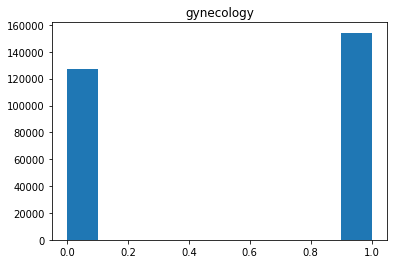

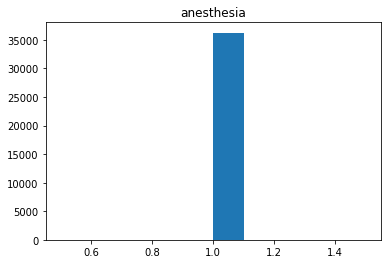

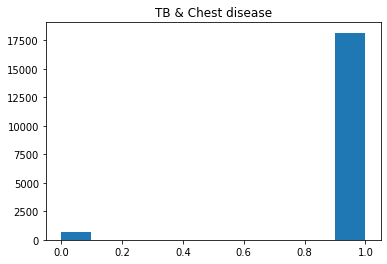

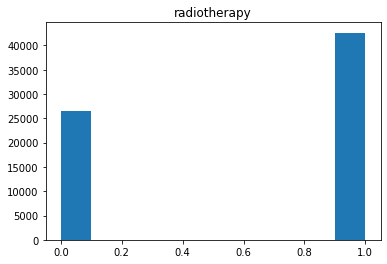

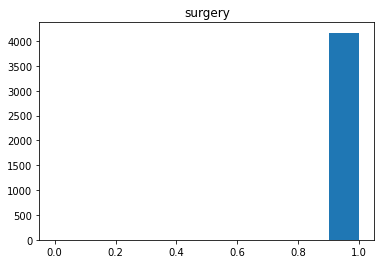

In [106]:
df_dep_stay = df.groupby(['Department'])['Stay (in days)']
for dep in df['Department'].unique():
    plt.hist(df[df['Department'] == dep]['estadia_larga'])
    plt.title(dep)
    plt.show()

## Descripcion Estadistica

como es la columna 'Admission_Deposit'?

que tan agrupados y dispersos estan mis datos(std,rango intercuartil)

### analisis univariado

histograma y boxplot : variables numericas
barras: variable categoricas

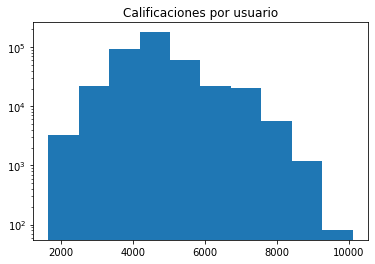

In [8]:
plt.hist(df.Admission_Deposit, log= True)
plt.title('Calificaciones por usuario')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_19772\1189687010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Available Extra Rooms in Hospital'], bins = 10, label = 'Train')


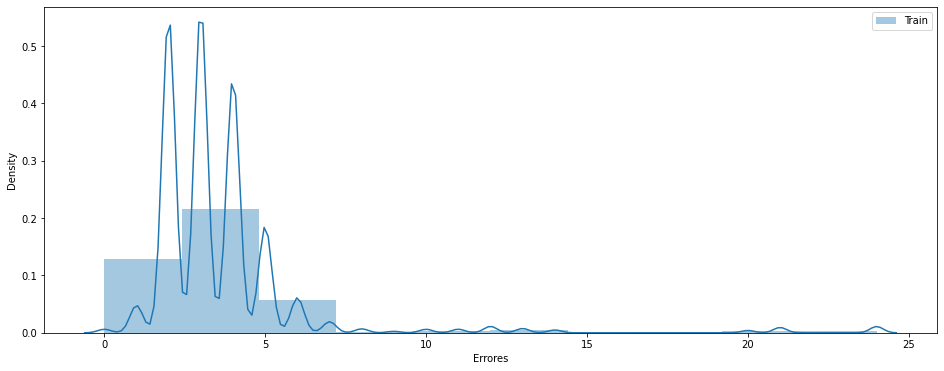

In [9]:
plt.figure(figsize = (16,6))

sns.distplot(df['Available Extra Rooms in Hospital'], bins = 10, label = 'Train')
plt.xlabel('Errores')
plt.legend()

### analisis bivariado y multivariado

grafico de dispercion: var cuantitativas

### Balance de la variable de salida

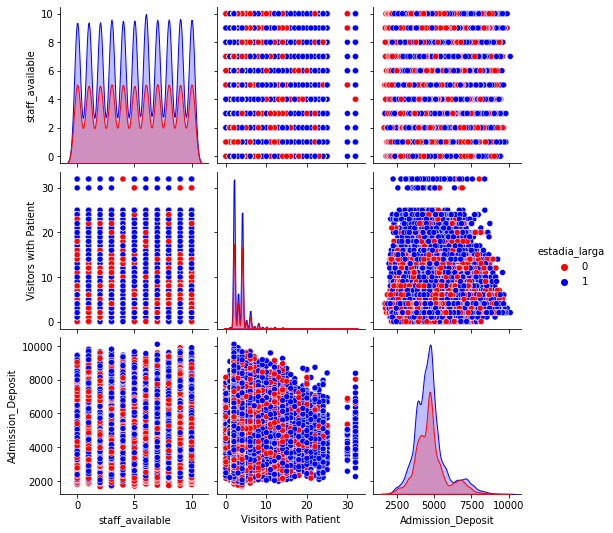

In [79]:
sns.pairplot(df[['Department','staff_available', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit', 'estadia_larga']], hue="estadia_larga", palette = ['r', 'b'])
plt.show()

### Correlacion mediante pandas y plt

#### Metodo 1

In [24]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

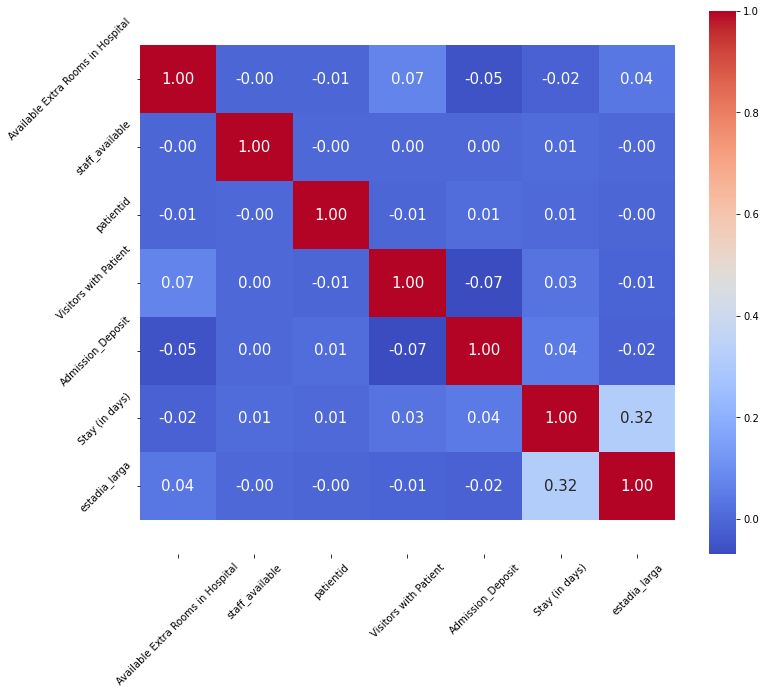

In [25]:
corr = df.corr()
plot_corre_heatmap(corr)

### Balance de ...

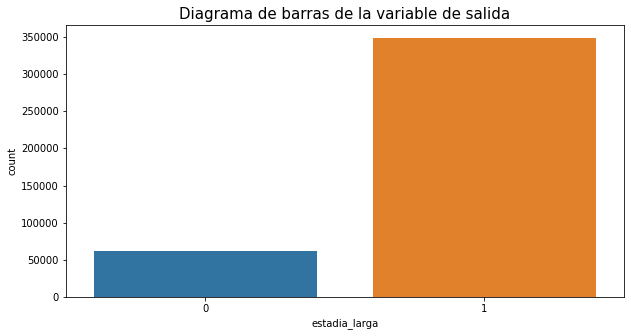

In [20]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción
plt.figure(figsize=(10,5))
sns.countplot(x = 'estadia_larga' ,label= 'Count', data = df)#equivelante a sns.countplot(df.nom_columna)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

## Finalmente elegiimos los feature

elemino features no relevantes

In [ ]:
df.drop(['Available Extra Rooms in Hospital','doctor_name','patientid'],axis=1,inplace=True)